In [3]:
# from mapbox import Static
import json
import numpy
from PIL import Image
from PIL import ImageDraw
import numpy as np
from shapely.geometry import shape, Polygon
import matplotlib.pyplot as plt
import math

In [15]:
with open('Lausanne.geojson') as json_data:
    vaud = json.load(json_data);

In [15]:


service = Static(access_token="pk.eyJ1Ijoidmx1ZiIsImEiOiJjamVpbDMxamEwYmI3MnFuNW8ybnI0NHdyIn0.dxuL9WvARgL4FFbSt-KUqA")

response = service.image('mapbox.light', lon=-61.7, lat=12.1, z=12)

with open('map.png', 'wb') as output:
    output.write(response.content)

In [5]:
def polygon_union(features, start=None):
    polygon = start
    for feature in features:
        if polygon is None:
            polygon = shape(feature['geometry'])
        else:
            polygon = polygon.union(shape(feature['geometry']))
    return polygon

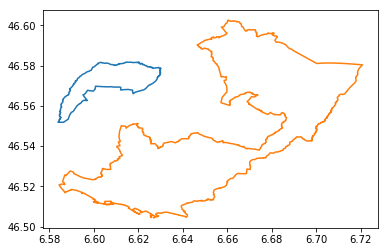

In [16]:
polygon_data = []
union_features = polygon_union(vaud['features'])
if isinstance(union_features, Polygon):
    polygons = [union_features]
else:
    polygons = list(union_features)
    
for p in polygons:
    c_x, c_y = p.exterior.xy
    plt.plot(c_x, c_y)

In [43]:
rand_tile_json = json.loads('{ "type": "Polygon", "coordinates": [ [ [ 6.66046142578125, 46.602280100138657 ], [ 6.660804748535156, 46.602280100138657 ], [ 6.660804748535156, 46.60204421728951 ], [ 6.66046142578125, 46.60204421728951], [ 6.66046142578125, 46.602280100138657 ] ] ] }')
rand_tile = shape(rand_tile_json)
print(centroid_x)

3.193148653869907


In [51]:
minx = np.inf
miny = np.inf
maxx = 0
maxy = 0
all_ys = []
data_points = {}
for i, p in enumerate(polygons):
    x, y = p.exterior.xy
    all_ys.extend(y)
    data_points[i] = {}
    data_points[i]['x'] = np.array(x)
    data_points[i]['y'] = np.array(y)
    cminx = data_points[i]['x'].min()
    cminy = data_points[i]['y'].min()
    cmaxx = data_points[i]['x'].max()
    cmaxy = data_points[i]['y'].max()
    if (cminx < minx): minx = cminx
    if (cminy < miny): miny = cminy
    if (cmaxx > maxx): maxx = cmaxx
    if (cmaxy > maxy): maxy = cmaxy
averagey = np.mean(all_ys)
xrange = maxx - minx # longitude
yrange = maxy - miny # latitude

xrange *= 111.320 / 110.574 * math.cos(math.radians(averagey))
for i in list(data_points.keys()):
    data_points[i]['x'] *= 111.320 / 110.574 * math.cos(math.radians(averagey))
    cminx = data_points[i]['x'].min()
    if (cminx < minx): minx = cminx
    
aspect_ratio = xrange / yrange
padding = 10
img_height = 512
drawable_height = img_height - 2 * padding
drawable_width = int(round(aspect_ratio * drawable_height))
img_width = drawable_width + 2 * padding

poly = Image.new('RGBA', (img_width, img_height))
back = Image.new('RGBA', (img_width, img_height), (255,255,255,0))
drawer = ImageDraw.Draw(poly)
drawer2 = ImageDraw.Draw(back)
for i in list(data_points.keys()):
    x = data_points[i]['x']
    y = data_points[i]['y']
    x = x - minx
    y = y - miny
    x /= xrange
    y /= yrange
    x = np.rint(x * drawable_width) + padding
    y = np.rint(y * drawable_height) + padding
    drawer.polygon(list(zip(x, y)), fill=(255,255,255,0),outline=(25,163,1,255))
    
centroid_x, centroid_y = rand_tile.centroid.x, rand_tile.centroid.y
centroid_x *= 111.320 / 110.574 * math.cos(math.radians(averagey))
new_centroid_x = centroid_x - minx
new_centroid_x /= xrange
new_centroid_x = np.rint(new_centroid_x * drawable_width) + padding
new_centroid_y = centroid_y - miny
new_centroid_y /= yrange
new_centroid_y = np.rint(new_centroid_y * drawable_height) + padding
print(new_centroid_x)
print(new_centroid_y)
drawer2.ellipse([(new_centroid_x-1, new_centroid_y-1), (new_centroid_x+1, new_centroid_y+1)], fill=(255, 0, 0, 255))


back.paste(poly,mask=poly)
back = back.transpose(Image.FLIP_TOP_BOTTOM)
back.show()

276.0
500.0


In [49]:
t1 = 6.66046142578125 * 111.320 / 110.574 * math.cos(math.radians(averagey))
t2 = 6.660804748535156 * 111.320 / 110.574 * math.cos(math.radians(averagey))
t1 = t1 - minx
t2 = t2 - minx
t1 /= xrange
t2 /= xrange
t1 = np.rint(t1 * drawable_width) + padding
t2 = np.rint(t2 * drawable_width) + padding

In [50]:
print(t1)
print(t2)

276.0
277.0
